### PCA

#### Theory

PCA is solving the equation 𝐴𝑥⃗ =𝜆𝑥⃗ , for some scalar 𝜆.  Another way of writing this equation to make the linear algebra clearer is (𝐴−𝜆𝐼)𝑥⃗ =0

IOW: "What is the set of vectors which, when I multiply them by my matrix of data, results in that same set of vectors just moved in space by a scalar distance"

The idea is that we want to transform our data into a set of mutually-orthoganal vectors which still capture most of the linear variance in the data.  Why?

- Dimensionally reduction.  As dimensions increase, observations get further apart and distance calculations, which a lot of techinuqes rely on, get less effective.  Picture trying to cluster 100 data points in 2 dimensions.  Now picture clustering 100 pts in 500.  By reducing dimensions, we're able to avoid the complications that come with spreading points further and further out.  

- By making the features in our data orthogonal, we're ensuring that values for observations in one dimension aren't dependent on information in another dimension.  This is large advantage in constructing models, since information in a given feature is soley about that feature, and not incorporating information from other features; models have an easier time distinguishing what information is coming from which feature.  When we go to predict off of orthogonal features, our techniques are able to make better predictions.

𝑥⃗ is a matrix of "eigenvectors", which we interpret as "principal components", the vectors along which there is linear variance in the data.  

The first principal component is the vector along which the data varies the most.  The second principal component is the vector along which the data varies the second most and is orthogonal to the first component.  The third princpal component is the vector along which the data varies third most and is orthogonal to the first two, etc. 

![pca](img/pca.png)

Eigenvalues, 𝜆, are stored in a matrix, the diagonal of which contain the eigenvalues: the specific values which apply to the equation in the first line. 

#### Code

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
iris = load_iris()

X = iris.data
y = iris.target
columns = iris.feature_names
df = pd.DataFrame(X)
df.columns = columns
df['Target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Before we apply PCA, let's take a look at how seperal the classes are based on the raw features present.

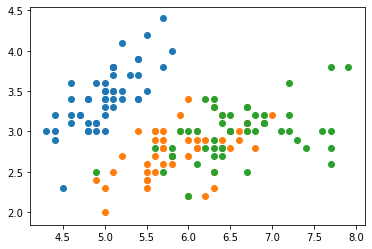

In [5]:
for target in df.Target.unique():
    temp = df[df.Target == target]
    plt.scatter(temp['sepal length (cm)'], temp['sepal width (cm)'])

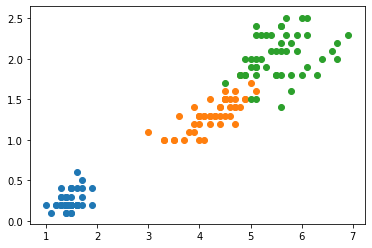

In [6]:
for target in df.Target.unique():
    temp = df[df.Target == target]
    plt.scatter(temp['petal length (cm)'], temp['petal width (cm)'])

### Fitting a PCA Model

In [23]:
pca = PCA(n_components=4)
X_transformed = pca.fit_transform(X)

X_transformed[0:10]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02]])

### Inspecting the Explained Variance of the Principal Components

Remember that PCA decomposes the original dataset into principal components which attempt to encapsulate the maximum amount of information as defined by the maximum variance across observations. With this, it is useful to investigate how much variance in the dataset is accounted for in the first $n$ components. 

While you will have the same number of principal components as you have original features to account for all of the variance in a dataset (assuming you don't have redundant features), the first few principal components will typically account for the vast majority of the variance.

sci-kit learn makes this very easy using the expalined_variance_ratio_ attribute of the instantiated PCA model object.

In [8]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [10]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

Now, we want to make this into a dataframe and attach it to our original data

In [13]:
X_transformed = pd.DataFrame(X_transformed)
X_transformed.columns = ['PC{}'.format(i+1) for i in range(len(X_transformed.columns))]
X_transformed.head()

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [15]:
df = pd.concat([df, X_transformed], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397,-0.027915,-0.002262
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001,-0.210464,-0.099027
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949,0.017900,-0.019968
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299,0.031559,0.075576
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755,0.090079,0.061259


Now, we can create that same scatterplot of our decomposed data

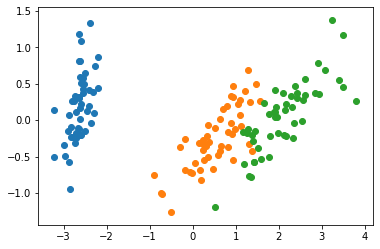

In [16]:
for target in df.Target.unique():
    temp = df[df.Target == target]
    plt.scatter(temp['PC1'], temp['PC2'])

### For the interested, here's how to calculate principal components manually

What follows is indebted to Sebastian Raschka (http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda).

In [ ]:
# We'll start by producing the covariance matrix for the columns of X_tr_sc.

cov_mat = np.cov(X_scaled, rowvar=False)
cov_mat.shape

In [ ]:
np.linalg.eig(cov_mat)

In [ ]:
# Let's assign the results of eig(cov_mat) to a double of variables.

eigvals, eigvecs = np.linalg.eig(cov_mat)

In [ ]:
# The columns of "eigvecs" are the eigenvectors!

eigvecs

In [ ]:
# The eigenvectors of the covariance matrix are our principal components.
# Let's look at the first three.

pcabh = np.vstack([row[:3].reshape(1, 3) for row in eigvecs])

Now, to transform our data points into the space defined by the principal components, we simply need to compute the dot-product of X_scaled with those principal components.

Why? Think about what this matrix product looks like:

We take a row of X_scaled and multiply it by a column of pcabh, pairwise. The row of X_scaled represents the values for the columns in the original space. The column of pcabh represents the weights we need on each of the original columns in order to transform a value into principal-component space. And so the product of these two matrices will be each row, transformed into principal-component space!

In [ ]:
X_scaled.dot(pcabh)

In [ ]:
# Naturally, sklearn has a shortcut for this!

pca = PCA(n_components=3)                       # Check out how `n_components` works

X_new = pca.fit_transform(X_scaled)

In [ ]:
# Let's check out the explained variance

pca.explained_variance_

In [ ]:
# The ratio is often more informative

pca.explained_variance_ratio_

In [20]:
# We can also check out the Principal Components themselves

pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])